In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from preprocess import load_data, load_clean_data, data_stats, create_features, create_features_labels
from plots import plot_validation_diagram, plot_samples, plot_avg, plot_ewma, detect_raw_signal
from IPython.display import display
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load whole dataset

In [15]:
data = load_data(range(8))

Error while parsing file inxed=2 , [Errno 2] No such file or directory: 'dataset/2.ann.gz'
Error while parsing file inxed=4 , [Errno 2] No such file or directory: 'dataset/4.ann.gz'


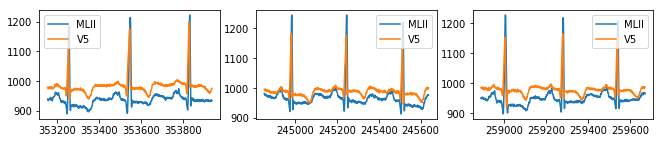

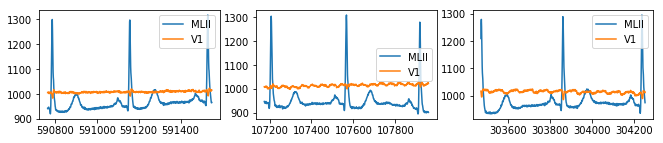

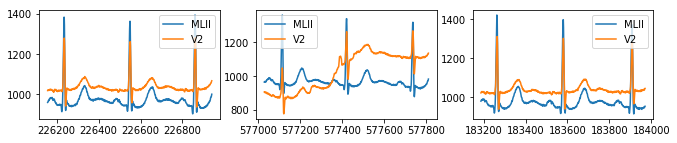

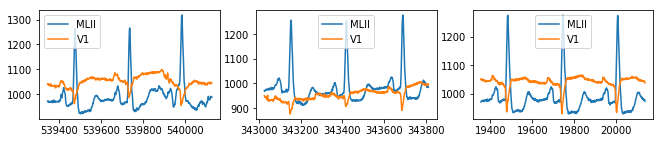

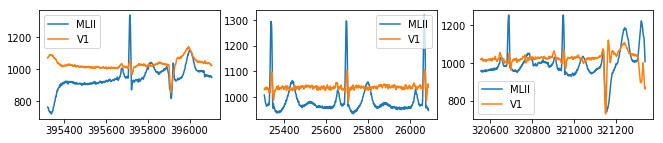

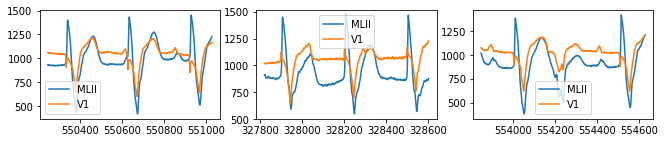

In [20]:
plot_samples(data)

### Load top model

In [4]:
top_model_path = 'weights/top_model_navlr.h5'

In [5]:
tm = load_model(top_model_path)

### Experiment with raw signal

In [23]:
t1 = pd.read_csv('dataset/dane.csv')
t2 = pd.read_csv('dataset/pb360.csv')

In [24]:
s1 = t1[t1['TYPE'] == 'SIGNAL'].drop('TYPE', axis = 1)
s2 = t2[t2['TYPE'] == 'SIGNAL'].drop('TYPE', axis = 1)

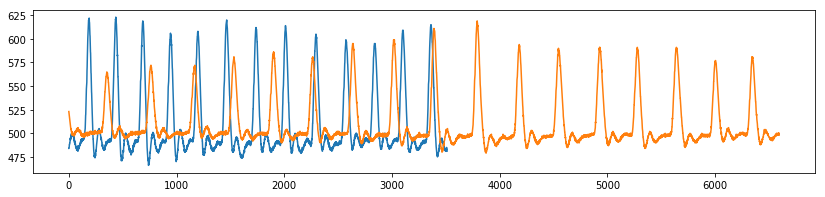

In [41]:
plt.figure(figsize=(14,3))
plt.plot(s1['VALUE'])
plt.plot(s2['VALUE'])

In [25]:
scaler = MinMaxScaler()

In [26]:
s1['S'] = scaler.fit_transform(s1['VALUE'].values.reshape(-1,1))
s2['S'] = scaler.fit_transform(s2['VALUE'].values.reshape(-1,1))

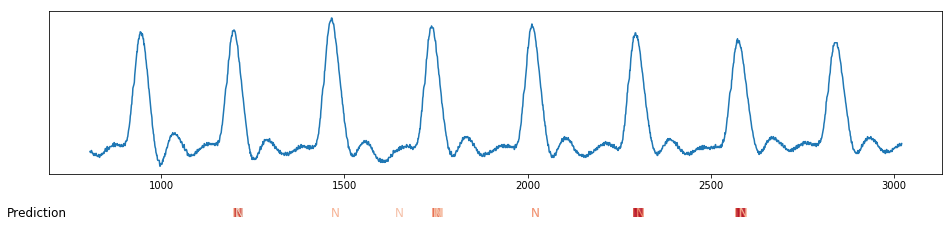

In [11]:
detect_raw_signal(tm,['A', 'L', 'N', 'NB', 'R', 'V'] , s1* .5 + .5, 800, 3000)

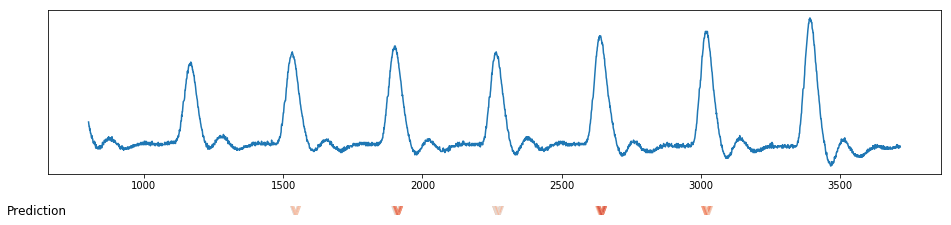

In [72]:
detect_raw_signal(tm, ['A', 'L', 'N', 'NB', 'R', 'V'] , s2 * .3 + .5, 800, 3700)

In [43]:
data[1]['signals']['S'] = scaler.fit_transform(data[1]['signals']['MLII'])

/home/buzz/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/buzz/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


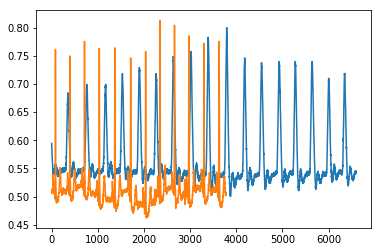

In [70]:
#plt.figure(figsize=(14,2))
#plt.plot(s1['S'][0:3784] * .5 + .5)
plt.plot(s2['S'][0:]  *.3 + 0.5)
plt.plot(data[1]['signals']['S'][0:3784])